In [5]:
import csv

characters = []

with open("HP_characters.csv", "r", encoding="utf8") as sent_file:
    csv = csv.reader(sent_file, delimiter=",")
    for row in csv:
        name = row[0].replace(' ', '_')
        parentage = row[1]
        house = row[2]
        occupation = row[3]
        characters.append((name, parentage, house, occupation))

#characters

In [6]:
# Try to get the pages:
import urllib.request
import json
from urllib.parse import quote

url = 'http://example.com/'
response = urllib.request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')

misses = []
lengths = []
disambig = []

#baseurl = "https://en.wikipedia.org/w/api.php?"

#https://harrypotter.fandom.com/wiki/Special:Search?query=Dumbledore&scope=internal&navigationSearch=true&so=trending
#https://www.reddit.com/r/learnpython/comments/muwu7v/scraping_fandomwiki_pages/
baseurl = "https://harrypotter.fandom.com/api.php?"

action = "action=query"

for character in characters:
    #print(character)
    title = "titles=" + character[0]
    #print(title)
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    #print(query)
    #try:
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    lengths.append((character, len(wikitext)))

    #print(wikitext)
    
    try:
        jsonobj = json.loads(wikitext)
    except ValueError: 
        print(f'Decoding JSON has failed for {character}, moving on...')
    num = list(jsonobj['query']['pages'].keys())[0]
    #print(jsonobj['query']['pages'][num].keys())
    wikitext = jsonobj['query']['pages'][num]['revisions'][0]['*']
    #wikitext = jsonobj['query']['pages'][num]['revisions'][0]['slots']['main']['*']
    f_name = character[0] + '.txt'
    with open("characters/" + f_name, 'w') as f:
        f.write(wikitext)


    #print(len(wikitext))
      #except:
  #  misses.append(quote(character))

In [3]:
print(sorted(lengths, key=lambda x: x[1]))

[(('Hetty_Bayliss', 'Muggle', 'other', 'other'), 1856), (('Connolly', 'Other', 'Other', 'Other'), 1883), (('Mullet', 'other', 'other', 'other'), 1902), (('Orla_Quirke', 'other', 'Ravenclaw', 'Student'), 1909), (('Derek', 'Other', 'Other', 'Student'), 1969), (('Tufty', 'Cat', 'other', 'other'), 2003), (('Owen_Cauldwell', 'other', 'Hufflepuff', 'Student'), 2056), (('Chambers', 'Other', 'Ravenclaw', 'Student'), 2171), (('Nick_Clegg', 'Muggle', 'other', 'other'), 2191), (('Laura_Madley', 'other', 'Hufflepuff', 'Student'), 2211), (('Urquhart_Rackharrow', 'Portrait', 'other', 'other'), 2244), (('Lisa_Turpin', 'other', 'Ravenclaw', 'Student'), 2255), (("Graham_Montague's_mother", 'other', 'other', 'other'), 2281), (('Williamson', 'other', 'other', 'other'), 2301), (("Graham_Montague's_father", 'other', 'other', 'other'), 2309), (('Troy', 'other', 'other', 'other'), 2315), (('Cook_of_The_Hanged_Man', 'Muggle', 'other', 'other'), 2316), (('Rosemary_Ames', 'Muggle', 'other', 'other'), 2331), (("

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lengths_s = [x[1] for x in lengths]

# Histogram for bad guys
number_of_bins = 10
histogram = np.histogram(lengths_s, number_of_bins)

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.plot(x_values, y_values)
plt.title(f'Length of articles')
plt.xlabel('Length')
plt.ylabel('Number of articles')
plt.figtext(.5,-0.05, f"text", ha='center')
plt.show()

print(f"Minimum length = {np.min(lengths_s)}")

NameError: name 'lengths' is not defined

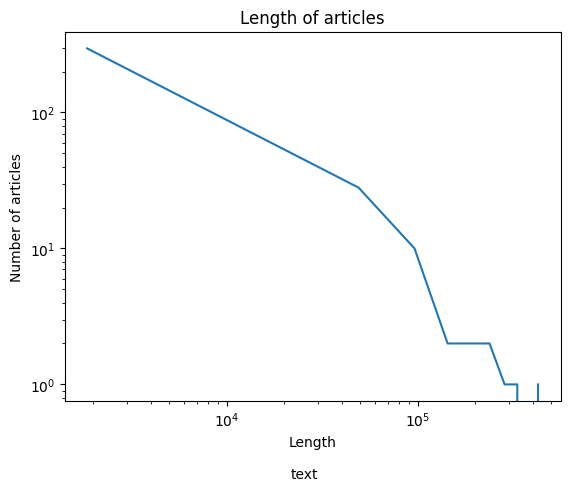

Minimum length = 1856


In [5]:
# Histogram for bad guys
number_of_bins = 10
histogram = np.histogram(lengths_s, number_of_bins)

x_values = histogram[1][:-1]
y_values = histogram[0]

plt.plot(x_values, y_values)
plt.title(f'Length of articles')
plt.xlabel('Length')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of articles')
plt.figtext(.5,-0.05, f"text", ha='center')
plt.show()

print(f"Minimum length = {np.min(lengths_s)}")

In [3]:
sum(lengths_s)/len(lengths_s)

NameError: name 'lengths_s' is not defined